# Disparidad en Tiempos de Reparación: Un Análisis entre Verizon (ILEC) y Competidores (CLEC)

Verizon es la principal empresa de telecomunicaciones en una amplia zona del este de Estados Unidos, conocida como ILEC (Incumbent Local Exchange Carrier). Como ILEC, tiene la responsabilidad de ofrecer servicios de reparación a los clientes de otras compañías telefónicas que compiten en esta región, denominadas CLEC (Competing Local Exchange Carrier).

Verizon está sujeto a sanciones si los tiempos de reparación para los clientes de CLEC son considerablemente peores que los tiempos de reparación para los clientes de Verizon. Para evaluar esta situación, se ha recopilado un conjunto de datos de Verizon que incluye muestras de los tiempos de reparación para dos grupos: uno con 1664 clientes de Verizon (ILEC) y otro con 23 clientes de la competencia (CLEC).

El objetivo es determinar si existe una diferencia significativa entre los tiempos promedio de reparación de estos dos grupos, lo que podría considerarse como evidencia para tomar medidas, como imponer sanciones a Verizon. Para cumplir con el objetivo de estudio, se propone el análisis en tres momentos claves:

- **Análisis Bayesiano**. En este momento consideraremos lo siguiente:
\begin{align*}
    y_{k,i} &\stackrel{\text{iid}}{\sim} \text{Exp}(\lambda_k) \hspace{0.25cm} y_{k,i} > 0, \hspace{0.25cm} \lambda_k > 0  \\
    \lambda_k  &\sim \text{GI}(a_k, b_k)
\end{align*}
Donde i = 1, $...$, $n_k$ y $k$ = 1, 2. Los valores de $k$ corresponden a ILEC y CLEC, respectivamente. Por lo tanto, la distribución posterior:
\begin{align*}
    \lambda_k | {y_{k}} \sim \text{GI}(a_k + n_k, b_k + s_k)
\end{align*}
Donde $a_k$ y $b_k$  son hiperparámetros conocidos para cada grupo y $s_k = \sum_{i=1}^{n_k} y_{k,i}$. En consecuencia, la inferencia sobre la diferencia entre los tiempos promedio de reparación sería alrededor de:
$\eta = \lambda_1 - \lambda_2$.

- **Análisis frecuentista**. En este momento, vamos a considerar \textit{Bootstrap} parámetrico, \textit{Bootstrap} no paramétrico y la teoría asintontica de MLE. Para esta última tengase en cuenta lo siguiente:
\begin{align*}
    \hat{\lambda}_{k,\text{MLE}} = \bar{y}_k, \hspace{0.5cm} \bar{y}_k = \frac{1}{n_k}\sum_{i=1}^{n_k}y_{k,i}\\
    \widehat{\eta}_{\text{MLE}} = \hat{\lambda}_{1,\text{MLE}} - \hat{\lambda}_{2,\text{MLE}}
\end{align*}
Dado la teoría asintotica de la estimación por MLE, $\lambda_k \stackrel{\text{A}}{\sim} N(\hat{\lambda}_k, I_{k}^{-1})$. Por lo tanto, la distribución asintotica de $\widehat{\eta}_{\text{MLE}}$ es:
\begin{align*}
    \widehat{\eta}_{k,\text{MLE}} \stackrel{\text{A}}{\sim} N\left(\hat{\lambda}_1 - \hat{\lambda}_2, \frac{\bar{y}_1^2}{n_1} + \frac{\bar{y}_2^2}{n_2}\right)
\end{align*}

- Simulación de poblaciones exponenciales, en diferentes escenarios aplicando el método Bayesiano, teoría asintótica de MLE, *Bootstrap* paramétrico y no paramétrico.  


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import arviz as az
import scipy.stats as stats
import random
import matplotlib.pyplot as plt

## Análisis Bayesiano

In [ ]:
verizon = pd.read_csv('Verizon.csv')
verizon.head()

,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


### Distribución posterior de $\eta$

Ajustaremos un modelo Gamma-Inversa-Exponencial, presentado en anteriormente, para esto se propuso como hiperparámetros $a_k = 3$ y $b_k = 17$, para todo valor de $k$. Por lo tanto, ajustado las distribuciones para $\lambda_k$, se obtiene la distibución de $\eta$, así como estimaciones puntuales, como la media, el coeficiente de variación - CV y el intervalo de credibilidad - IC al 95\%. Por lo tanto, se obtienen los siguientes resultados:

In [ ]:
Y1 = verizon.query('Group == "ILEC"')['Time']
Y2 = verizon.query('Group == "CLEC"')['Time']

In [ ]:
#Tamños de grupos
n1 = len(Y1)
n2 = len(Y2)

#Estadísticas suficientes
s1 = Y1.sum()
s2 = Y2.sum()

# Medias del timepo de reparación grupo
MeanY1 = Y1.mean()
MeanY2 = Y2.mean()

#Desvíos estandar del tiempo reparación
sdY1 = Y1.std()
sdY2 = Y2.std()

pd.DataFrame({'Grupo':['ILEC', 'CLEC'],'Tamaños':[n1, n2], 'Media': [MeanY1, MeanY2],
              'SD':[sdY1, sdY2], 'Est. Suf':[s1, s2]})

,Grupo,Tamaños,Media,SD,Est. Suf
0,ILEC,1664,8.411611,14.690039,13996.92
1,CLEC,23,16.509130,19.503576,379.71


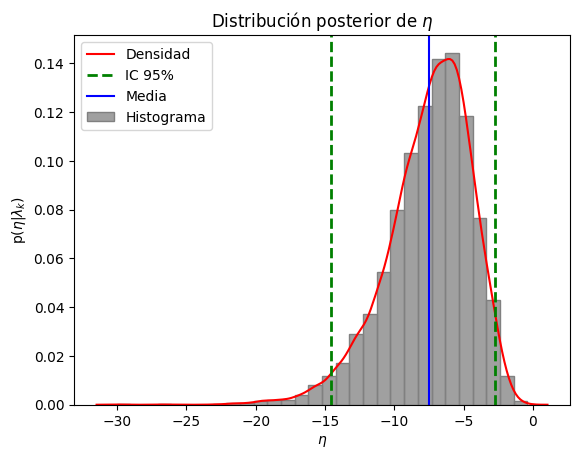

In [ ]:
#Hiparámetros
ak = 3
bk = 17

#Parametros posterior - ILEC
a1p = ak + n1
b1p = bk + s1
#Prametros posterior - CLEC
a2p = ak + n2
b2p = bk + s2

#Simulación de monte carlo
np.random.seed(79)
l1 = stats.invgamma.rvs(size = 10000, a = a1p, scale = b1p)
np.random.seed(79)
l2 = stats.invgamma.rvs(size = 10000, a = a2p, scale = b2p)
eta = l1 - l2

#Distribución posterior de eta
sns.histplot(data = eta, bins = 30, color = 'gray', edgecolor = 'gray',
             label = 'Histograma', stat = 'density')
sns.kdeplot(data = eta, color = 'red', label = 'Densidad')
plt.axvline(np.percentile(eta, q = 2.5), color='green', linestyle='dashed', linewidth=2, label='IC 95%')
plt.axvline(np.percentile(eta, q = 97.5), color='green', linestyle='dashed', linewidth=2)
plt.axvline(eta.mean(), color='blue', linewidth=1.5, label = 'Media')
plt.legend()
plt.title(r'Distribución posterior de $\eta$')
plt.xlabel(r'$\eta$')
plt.ylabel(r'p$(\eta | \lambda_k)$')
plt.show()

In [ ]:
#Resultados
pd.DataFrame({'Media': [eta.mean()], 'CV %':[(eta.std()/np.abs(eta.mean()))*100],
              'IC inf': [np.percentile(eta, q = 2.5)], 'IC Sup':[np.percentile(eta, q = 97.5)]})

,Media,CV %,IC inf,IC Sup
0,-7.519226,40.659543,-14.571913,-2.752657


Basándonos en la gráfica y Tabla enterior, se concluye que el tiempo promedio de reparación de los clientes CLEC es significativamente mayor que el de Verizon. La diferencia media es de -7.51, lo que implica que CLEC tiene un tiempo de reparación 7.46 unidades mayor que Verizon. Además, se observa una alta variabilidad, con una variación relativa del 40.65\%. Esto se refleja en el Intervalo de Credibilidad, donde, con un 95\% de confianza, el valor real de $\eta$ cae en el rango (-14.57, -2.75). Por lo tanto, se debería multar a Verizon dado que los tiempos medios de reparación son peores para los clientes de alguna CLEC.

### Análisis de sensitividad

Se realizará un análisis de sentividad considerando, los siguientes estados información externa al conjunto de datos. Para cada estado de información calcularemos la media y el coeficiente de variación - CV, de manera previa y posterior; además el Intervalo de Credibilidad - IC para la posterior.

- Estado de información - Previa 1: $a_k = 3$ y $b_k = 17$, para $k = 1,2$
- Estado de información - Previa 2: $a_k = 2$ y $b_k = 8.5$, para $k = 1,2$
- Estado de información - Previa 3: $a_k = 3$ y $b_1 = 16.8$ y $b_2 = 33$, para $k = 1,2$
- Estado de información - Previa 4: $a_k = 2$ y $b_1 = 8.4$ y $b_2 = 16.5$, para $k = 1,2$


Las estadísticas para la información previa está dada por la Tabla  a continuación.

| Estadísticas   | Previa 1 | Previa 2 | Previa 3 | Previa 4 |
| -------------- | -------- | -------- | -------- | -------- |
| Media          | 0        | 0        | -8.1     | -8.1     |
| CV \%          | Ind.     | Ind.     | 228.58   | Ind.     |

Tras ajustar los hiperparámetros en el análisis Bayesiano de tiempos de reparación entre Verizon (ILEC) y competidores (CLEC), se observa que para la previa 1 y 2 la diferencia del tiempo medio es 0, es decir, que ILEC y CLEC tienen el mismo tiempo medio de reparación, lo cual contrasta con la información que proporciona la previa 3 y 4, las cuáles indican que los tiempos de reparación de CLEC son mayores que las de ILEC. Las indeterminaciones (Ind.) en los coeficientes de variación a priori de Previa 1, 2 y 4 indican una incertidumbre considerable en estas estimaciones, al igual que el coeficiente de variación de la Previa 3, que si bien se conoce, la incertumbre sobre la estimación es sustancial.

In [ ]:
#Hiperparametros
a = [3, 2, 3, 2]
b1 = [17, 8.5, 16.8, 8.4]
b2 = [17, 8.5, 33, 16.5]

#Almacenamiento
col = ['Previa ' + str(i) for i in range(1, 5)]
MC = pd.DataFrame(np.empty((10000, 4)), columns = col)
EST = pd.DataFrame(np.empty((4, 4)), columns = col)

#Análisis de sensitividad
np.random.seed(79)
for i in range(0,4):
    y = (stats.invgamma.rvs(size = 10000, a = a[i] + n1, scale = b1[i] + s1) -
    stats.invgamma.rvs(size = 10000, a = a[i] + n2, scale = b2[i] + s2))
    MC[col[i]] = y
    EST[col[i]] = [np.mean(y), (np.std(y)/np.abs(y.mean()))*100, np.percentile(y, 2.5), np.percentile(y, 97.5)]

In [ ]:
MC.head()

,Previa 1,Previa 2,Previa 3,Previa 4
0,-10.248932,-11.119048,-4.938926,-11.835306
1,-5.560560,-6.078879,-3.851925,-11.217732
2,-12.195170,-13.202318,-6.254161,-15.621740
3,-7.229681,-7.123358,-6.151414,-9.383863
4,-7.893002,-3.435127,-10.579138,-9.604462


In [ ]:
EST['Estadística'] = ['Media', 'CV %', 'IC Inf', 'IC Sup']
EST.head()

,Previa 1,Previa 2,Previa 3,Previa 4,Estadística
0,-7.424151,-7.770401,-8.052592,-8.181079,Media
1,43.694756,43.157326,41.065772,43.019639,CV %
2,-14.941448,-15.351694,-15.666705,-16.258230,IC Inf
3,-2.373145,-2.505088,-2.854737,-2.713897,IC Sup


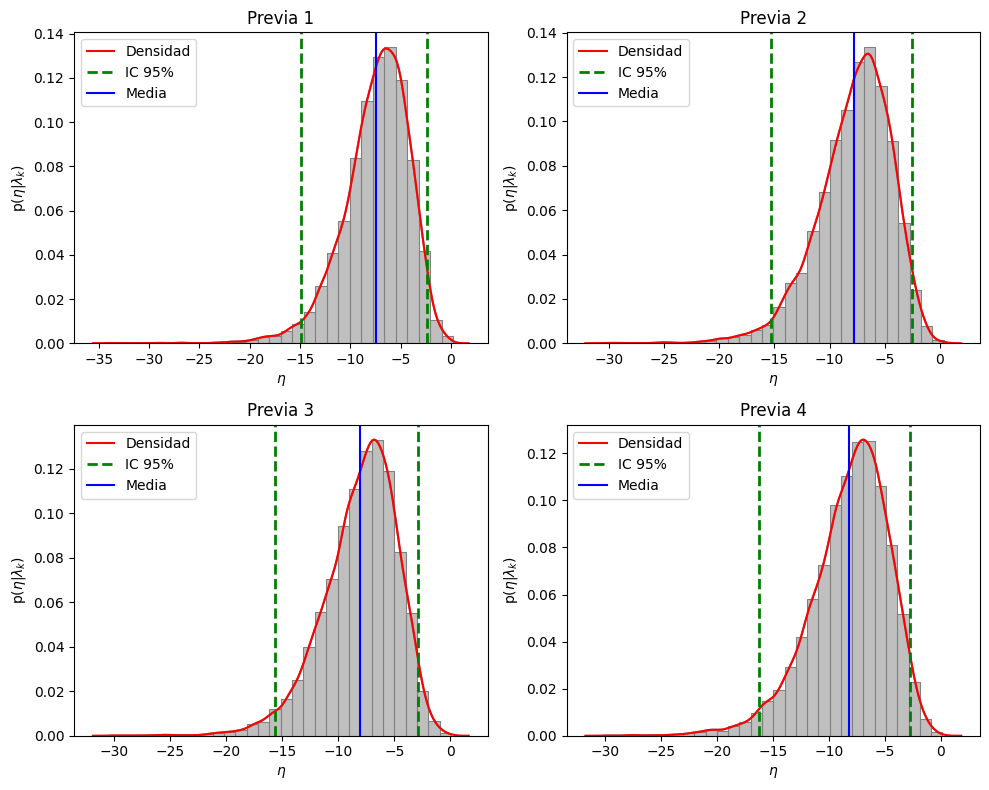

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Iterar sobre cada columna y crear un gráfico
for i, columna in enumerate(MC.columns):
    # Gráfico de distribución (histograma)
    sns.histplot(MC[columna], ax=axes[i//2, i%2], kde=True, stat = 'density',
                 color = 'gray', edgecolor = 'gray', bins = 30)
    sns.kdeplot(MC[columna], ax=axes[i//2, i%2], color = 'red', label = 'Densidad')
    axes[i//2, i%2].axvline(np.percentile(MC[columna], q = 2.5), color='green', linestyle='dashed', linewidth=2, label='IC 95%')
    axes[i//2, i%2].axvline(np.percentile(MC[columna], q = 97.5), color='green', linestyle='dashed', linewidth=2)
    axes[i//2, i%2].axvline(MC[columna].mean(), color='blue', linewidth=1.5, label = 'Media')
    axes[i//2, i%2].set_xlabel(r'$\eta$')
    axes[i//2, i%2].set_ylabel(r'p$(\eta | \lambda_k)$')
    axes[i//2, i%2].set_title(f'{columna}')
    axes[i//2, i%2].legend()
# Ajustar el diseño
plt.tight_layout()
plt.show()

Las distribuciones posteriores revelan diferencias significativas en los tiempos de reparación entre ILEC y CLEC, respaldadas por IC del 95$\%$. Las diferencias observadas sugieren que los tiempos de reparación de CLEC son, en promedio, más largos que los de ILEC. Además, el modelo es robusto dado que el estado de información previo, no está influyendo de manera sustancial en las inferencias de $\eta$.

### Bondad de ajuste

En cada población, ILEC y CLEC, avaluaremos la bondad de ajuste con el estado de información 1 (previa 1), usando como estadísticos de pruebas la media y la desviación estándar.

In [ ]:
column = ['Media ILEC', 'SD ILEC', 'Media CLEC', 'SD CLEC']
BA = pd.DataFrame(np.empty((10000, 4)), columns = column)
B = 10000
np.random.seed(79)
for b in range(0,B):
    l1 = stats.invgamma.rvs(size = 1, a = a1p, scale = b1p)
    y1 = stats.expon.rvs(size = n1, scale = l1)
    l2 = stats.invgamma.rvs(size = 1, a = a2p, scale = b2p)
    y2 = stats.expon.rvs(size = n2, scale = l2)
    BA.iloc[b] = [y1.mean(), y1.std(), y2.mean(), y2.std()]
BA.head()

,Media ILEC,SD ILEC,Media CLEC,SD CLEC
0,8.343789,8.206009,10.252486,10.220875
1,8.664955,8.250844,19.087619,18.588316
2,8.623115,8.767013,10.737766,7.968213
3,8.405756,8.276202,15.344275,10.941654
4,9.033302,9.118327,20.545926,19.635762


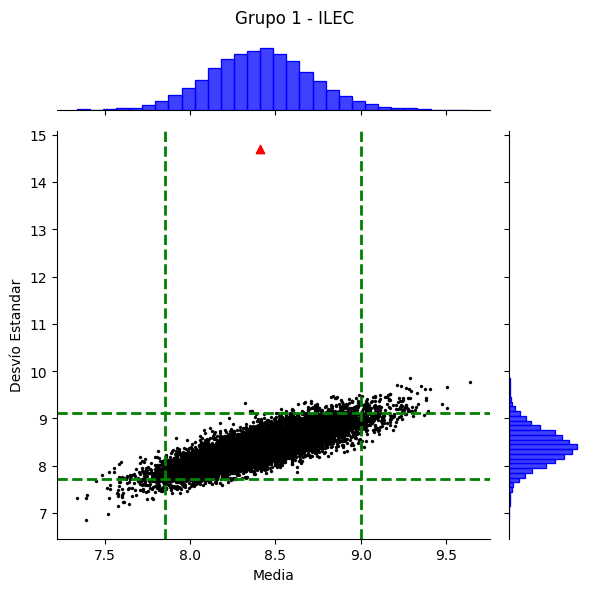

In [ ]:
(sns.jointplot(x="Media ILEC", y="SD ILEC", edgecolor="black", color = 'black',
              data = BA, s = 5, marginal_kws=dict(bins = 30, color = 'blue',edgecolor = 'blue'))
.set_axis_labels('Media', 'Desvío Estandar')
.fig.suptitle('Grupo 1 - ILEC'))
qx = np.percentile(BA['Media ILEC'], [2.5, 97.5])
qy = np.percentile(BA['SD ILEC'], [2.5, 97.5])
plt.axvline(qx[0], linestyle='dashed', color='green', linewidth=2)
plt.axvline(qx[1], linestyle='dashed', color='green', linewidth=2)
plt.axhline(qy[0], linestyle='dashed', color='green', linewidth=2)
plt.axhline(qy[1], linestyle='dashed', color='green', linewidth=2)
plt.scatter(MeanY1, sdY1, color = 'red', edgecolor = 'red', marker = '^')
plt.tight_layout()
plt.show()

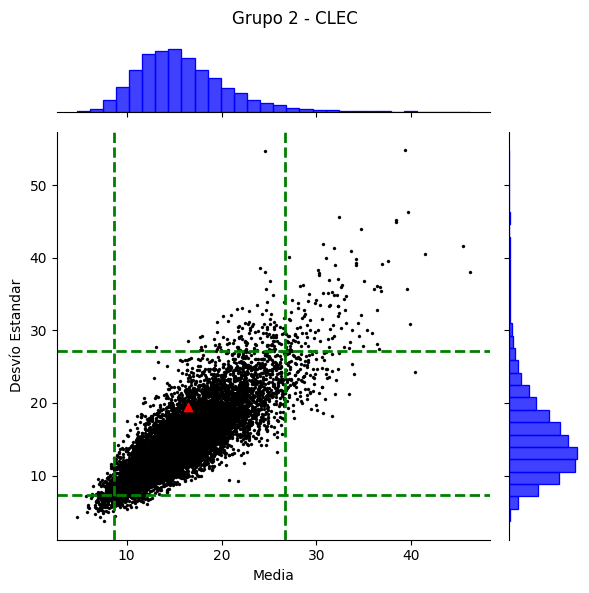

In [ ]:
(sns.jointplot(x="Media CLEC", y="SD CLEC", edgecolor="black", color = 'black',
              data = BA, s = 5, marginal_kws=dict(bins = 30, color = 'blue', edgecolor = 'blue'))
.set_axis_labels('Media', 'Desvío Estandar').fig.suptitle('Grupo 2 - CLEC'))
qx = np.percentile(BA['Media CLEC'], [2.5, 97.5])
qy = np.percentile(BA['SD CLEC'], [2.5, 97.5])
plt.axvline(qx[0], linestyle='dashed', color='green', linewidth=2)
plt.axvline(qx[1], linestyle='dashed', color='green', linewidth=2)
plt.axhline(qy[0], linestyle='dashed', color='green', linewidth=2)
plt.axhline(qy[1], linestyle='dashed', color='green', linewidth=2)
plt.scatter(x = MeanY2, y = sdY2, color = 'red', edgecolor = 'red', marker = '^')
plt.tight_layout()
plt.show()

In [ ]:
#Valor P Predictivo Posterior - PPP
pd.DataFrame({'Grupo': ['ILEC', 'CLEC'], 'Media': [np.mean(BA['Media ILEC'] > MeanY1),
                                      np.mean(BA['Media CLEC'] > MeanY2)],
 'SD':[np.mean(BA['SD ILEC'] > sdY1), np.mean(BA['SD CLEC'] > sdY2)]})

,Grupo,Media,SD
0,ILEC,0.4961,0.0000
1,CLEC,0.3834,0.1626


Atendiendo a las gráficas y tabla presentadas anteiormente, para CLEC se obtiene que tanto la media como el desvío estandar están siendo estimados correctamente dado que el valor p predictivo posterior - PPP se encuentra cercano a 0.5 y su valor observado está contenido en la región de credibilidad. Acto que solo sucede para la media de ILEC, ya que para el desvío estandar el PPP es 1 y el valor observado se encuentra en la cola derecha de la distribución, en consecuencia el modelo subestimada el desvío estandar para ILEC.

## Análisis Frecuentista

Con el estado de información de la Sección 2.1, se realizará análisis, usando la Normalidad asintótica del MLE, descrito en la Introducción, además del *Bootstrap* parámetrico, no parámetrico y por supuesto el Bayesiano. Para esto consideremos un total de 10000 replicaciones, por lo que se obtuvieron los resultados descritos a continuació

In [ ]:
# Normalidad Asintótica
def mle(meanY1, meanY2, n1, n2):
    meanEta = meanY1 - meanY2
    sd = np.sqrt(((meanY1**2) / n1) + ((meanY2**2) / n2))
    cvEta = np.abs(sd / meanEta)
    IC = [meanEta - (1.96 * sd), meanEta + (1.96 * sd)]
    return {'meanEta': meanEta, 'cv': cvEta, 'IC': IC}

#Boostrap parámetrico
def bostP(B, mean_y1, mean_y2, n1, n2):
    eta_hat = np.empty(B)
    for i in range(B):
        y1 = np.mean(stats.expon.rvs(scale=mean_y1, size=n1))
        y2 = np.mean(stats.expon.rvs(scale=mean_y2, size=n2))
        eta_hat[i] = y1 - y2
    meanEtaP = np.mean(eta_hat)
    cvEtaP = np.abs(np.std(eta_hat) / meanEtaP)
    IC_P = np.percentile(eta_hat, q=[2.5, 97.5])

    return {'meanEta': meanEtaP, 'cvEta': cvEtaP, 'IC': IC_P}

#Boostrap no parámetrico
def bostNP(B, sample1, sample2, n1, n2):
    eta_hat = np.empty(B)
    for i in range(B):
        y1 = np.random.choice(sample1, size=n1, replace=True)
        y2 = np.random.choice(sample2, size=n2, replace=True)
        eta_hat[i] = np.mean(y1) - np.mean(y2)
    meanEtaNP = np.mean(eta_hat)
    cvEtaNP = np.abs(np.std(eta_hat) / np.mean(eta_hat))
    IC_NP = np.percentile(eta_hat, q=[2.5, 97.5])

    return {'meanEta': meanEtaNP, 'cvEta': cvEtaNP, 'IC': IC_NP}

np.random.seed(79)
Bp = bostP(10000, mean_y1 = MeanY1, mean_y2 = MeanY2, n1 = n1, n2 = n2)
np.random.seed(79)
Na = mle(meanY1 = MeanY1, meanY2 = MeanY2, n1 = n1, n2 = n2)
np.random.seed(79)
Bnp = bostNP(10000, sample1 = Y1, sample2 = Y2, n1 = n1, n2 = n2)

pd.DataFrame({'Método': ['Bayes', 'Boostrap P', 'Norm Asin.' ,'Boostrap NP'],
              'Media': [eta.mean(), Bp['meanEta'], Na['meanEta'], Bnp['meanEta']],
              'CV %' : [(eta.std()/np.abs(eta.mean()))*100,
                        Bp['cvEta']*100, Na['cv']*100, Bnp['cvEta']*100],
              'IC Inf': [np.percentile(eta, q=2.5), Bp['IC'][0], Na['IC'][0],
                         Bnp['IC'][0]],
              'IC Sup': [np.percentile(eta, q=97.5), Bp['IC'][1], Na['IC'][1],
                         Bnp['IC'][1]]})

,Método,Media,CV %,IC Inf,IC Sup
0,Bayes,-7.519226,40.659543,-14.571913,-2.752657
1,Boostrap P,-8.083422,42.602072,-15.405966,-1.996098
2,Norm Asin.,-8.097520,42.587882,-14.856702,-1.338338
3,Boostrap NP,-8.122720,49.079982,-17.044742,-1.764961


Con la información de la Tabla anterior, es preciso mencionar que la diferencia del tiempo medio de reparación sigue siendo mayor para CLEC, además que se tiene una variablidad relativa considerable. Por otro lado, la diferencia promedio y del coeficiente de variación no varían sustancialmente, se mantienen en el mismo rango de valor para cada método. Así también, sus intervalos de confianza y de crediblidad.

# Simulación

A continuacion simularemos 100000 muestras exponenciales teniendo en cuenta los escenarios y ajusteremos un modelo de manera Bayesiana y Frecuentista (Normalidad asintotica,\textit{Bootstrap} parámetrico y no paramétrico) y calcularemos la proporción de veces que el Intervalo de Confianza/Credibilidad 95\% contiene el valor real:

- Escenario 1: $n_1 = 10$, $n_2 = 10$, $\lambda_1 = \bar{y}_1$ y $\lambda_2 = \bar{y}_2$
- Escenario 2: $n_1 = 20$, $n_2 = 20$, $\lambda_1 = \bar{y}_1$ y $\lambda_2 = \bar{y}_2$
- Escenario 3: $n_1 = 50$, $n_2 = 50$, $\lambda_1 = \bar{y}_1$ y $\lambda_2 = \bar{y}_2$
- Escenario 4: $n_1 = 100$, $n_2 = 100$, $\lambda_1 = \bar{y}_1$ y $\lambda_2 = \bar{y}_2$


In [ ]:
ns = [10, 20, 50, 100]

# Valor real de eta
lambda1 = np.mean(y1)
lambda2 = np.mean(y2)
eta = lambda1 - lambda2

# Simulación
B = 1250
N = 100000
out_sim = pd.DataFrame(columns=['n', 'out_bayes', 'out_frec1', 'out_frec2', 'out_frec3'])
np.random.seed(79)
for n in ns:
    out_bayes = 0
    out_frec1 = 0
    out_frec2 = 0
    out_frec3 = 0

    for j in range(N):
        # Datos
        yy1 = stats.expon.rvs(scale=lambda1, size=n)
        yy2 = stats.expon.rvs(scale=lambda2, size=n)
        yb1 = np.mean(yy1)
        yb2 = np.mean(yy2)

        # Bayesiano: distribución previa 1
        lam1_mc = stats.invgamma.rvs(size=B, a=ak + n, scale=(bk + s1))
        lam2_mc = stats.invgamma.rvs(size=B, a=ak + n, scale=(bk + s2))
        ic_bayes = np.percentile(lam1_mc - lam2_mc, [2.5, 97.5])

        # Frecuentista: Normalidad asintótica
        ic_frec1 = yb1-yb2 + np.array([-1, 1])*(1.959964)*np.sqrt(yb1**2/n + yb2**2/n)

        # Frecuentista: Bootstrap paramétrico y no paramétrico
        eta_bp = np.array([np.mean(stats.expon.rvs(scale=yb1, size=n)) - np.mean(stats.expon.rvs(scale=yb2, size=n)) for _ in range(B)])
        eta_bnp = np.array([np.mean(np.random.choice(yy1, size=n, replace=True)) - np.mean(np.random.choice(yy2, size=n, replace=True)) for _ in range(B)])

        ic_frec2 = np.percentile(eta_bp, [2.5, 97.5])
        ic_frec3 = np.percentile(eta_bnp, [2.5, 97.5])

        # Proporciones
        out_bayes += ((ic_bayes[0] < eta) & (eta < ic_bayes[1]))/N
        out_frec1 += ((ic_frec1[0] < eta) & (eta < ic_frec1[1]))/N
        out_frec2 += ((ic_frec2[0] < eta) & (eta < ic_frec2[1]))/N
        out_frec3 += ((ic_frec3[0] < eta) & (eta < ic_frec3[1]))/N

    out_sim = out_sim.append({'n': n, 'out_bayes': out_bayes, 'out_frec1': out_frec1, 'out_frec2': out_frec2, 'out_frec3': out_frec3}, ignore_index=True)
print(out_sim)


KeyboardInterrupt: ignored

Con la información de la Tabla anterior, podemos observar que a medida que aumenta el tamaño de la muestra (de 10 a 100), la cobertura empírica tiende a mejorar en todos los métodos. Esto es consistente con lo que esperaríamos, ya que con muestras más grandes, los estimadores y los intervalos de confianza suelen ser más precisos. Ahora bien, de los 4 escenarios la cobertura más robusta es el de la normalidad sintótica, seguido del *Bootstrap* paramétrico, los cuáles se comportan muy similar. En tercer lugar se tiene, al método Bayesiano y por último el *Bootstrap* no paramétrico el cuál inicia con la cobertura más baja que los demás métodos con un 89\%.